In [1]:
import pandas as pd

# قراءة ملف البيانات
df = pd.read_csv('a. IDRiD_Disease Grading_Training Labels.csv')

# عرض أول 5 صفوف من البيانات
df.head()


,Image name,Retinopathy grade,Risk of macular edema,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,IDRiD_001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDRiD_002,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDRiD_003,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDRiD_004,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDRiD_005,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# نشوف عدد القيم المفقودة في كل عمود
df.isnull().sum()


Image name                  0
Retinopathy grade           0
Risk of macular edema       0
Unnamed: 3                413
Unnamed: 4                413
Unnamed: 5                413
Unnamed: 6                413
Unnamed: 7                413
Unnamed: 8                413
Unnamed: 9                413
Unnamed: 10               413
Unnamed: 11               412
dtype: int64

In [5]:
# نحذف الأعمدة اللي كلها مفقودة (فاضية)
df = df.dropna(axis=1, how='all')

# نتأكد إنهم انحذفوا
df.head()


,Image name,Retinopathy grade,Risk of macular edema,Unnamed: 11
0,IDRiD_001,3,2,NaN
1,IDRiD_002,3,2,NaN
2,IDRiD_003,2,2,NaN
3,IDRiD_004,3,2,NaN
4,IDRiD_005,4,0,NaN


In [7]:
# حذف الأعمدة اللي اسمها Unnamed (زي Unnamed: 11 وغيرها)
unnamed_cols = [col for col in df.columns if col.startswith('Unnamed')]
df = df.drop(columns=unnamed_cols)
df.head()

,Image name,Retinopathy grade,Risk of macular edema
0,IDRiD_001,3,2
1,IDRiD_002,3,2
2,IDRiD_003,2,2
3,IDRiD_004,3,2
4,IDRiD_005,4,0


In [15]:
# حذف العمود "Risk of macular edema" لأنه غير مطلوب
df = df.drop(columns=['Risk of macular edema '])

# نتأكد إنهم انحذفوا
df.head()

,Image name,Retinopathy grade
0,IDRiD_001,3
1,IDRiD_002,3
2,IDRiD_003,2
3,IDRiD_004,3
4,IDRiD_005,4


In [18]:
# نحسب عدد العينات في كل درجة من درجات اعتلال الشبكية
# هذا يساعدنا نعرف هل فيه توازن أو تفاوت في عدد العينات لكل فئة
df['Retinopathy grade'].value_counts()

Retinopathy grade
2    136
0    134
3     74
4     49
1     20
Name: count, dtype: int64

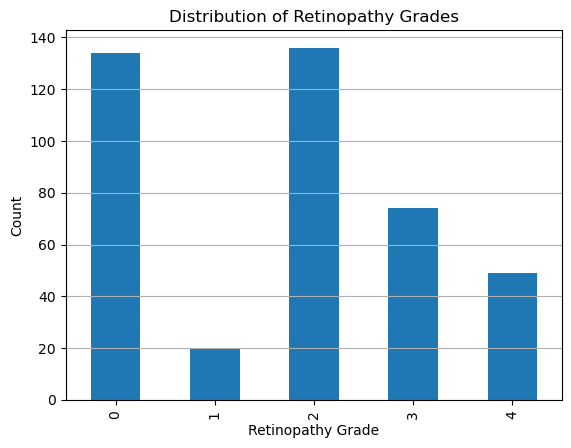

In [20]:
# نستورد مكتبة matplotlib لرسم الرسوم البيانية
import matplotlib.pyplot as plt

# نرسم رسم بياني عمودي (Bar Chart) لعرض عدد العينات في كل درجة من درجات الاعتلال
df['Retinopathy grade'].value_counts().sort_index().plot(kind='bar')

# نضيف عنوان للرسم
plt.title('Distribution of Retinopathy Grades')

# تسمية المحور الأفقي (الدرجات)
plt.xlabel('Retinopathy Grade')

# تسمية المحور العمودي (عدد الصور)
plt.ylabel('Count')

# نعرض شبكة خفيفة على المحور العمودي لتسهيل القراءة
plt.grid(axis='y')

# عرض الرسم
plt.show()


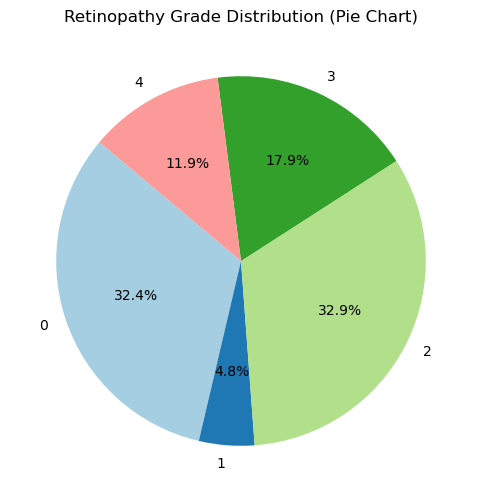

In [22]:
# نستورد المكتبة للرسم
import matplotlib.pyplot as plt

# نحسب عدد العينات في كل درجة
grade_counts = df['Retinopathy grade'].value_counts().sort_index()

# نسوي الرسم الدائري Pie Chart
plt.figure(figsize=(8, 6))  # حجم الرسم
plt.pie(
    grade_counts,                      # القيم اللي بنرسمها
    labels=grade_counts.index,         # التسميات (الدرجات)
    autopct='%1.1f%%',                 # عرض النسبة المئوية داخل كل جزء
    startangle=140,                    # زاوية بداية الرسم
    colors=plt.cm.Paired.colors        # ألوان مرتبة
)

# نضيف عنوان للرسم
plt.title('Retinopathy Grade Distribution (Pie Chart)')

# عرض الرسم
plt.show()


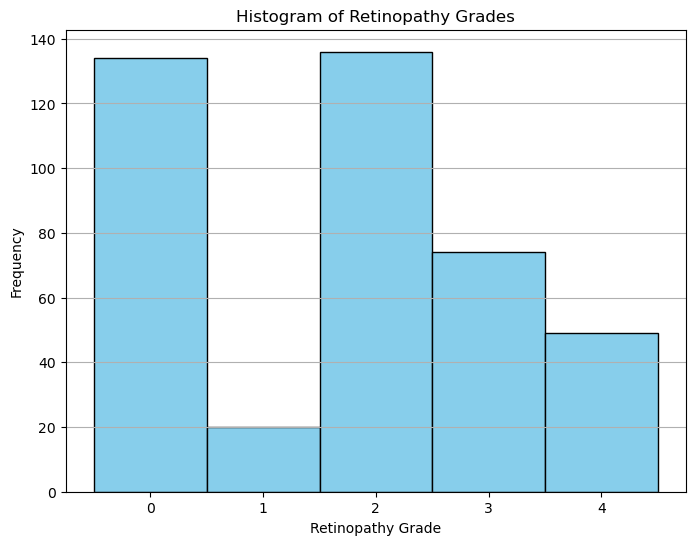

In [28]:
import matplotlib.pyplot as plt


bins = [0, 1, 2, 3, 4, 5]  # نضيف 5 علشان يشمل 4 بشكل كامل

plt.figure(figsize=(8, 6))
plt.hist(df['Retinopathy grade'], bins=bins, color='skyblue', edgecolor='black', align='left')

plt.title('Histogram of Retinopathy Grades')
plt.xlabel('Retinopathy Grade')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2, 3, 4])  # تحديد القيم على المحور X
plt.grid(axis='y')
plt.show()


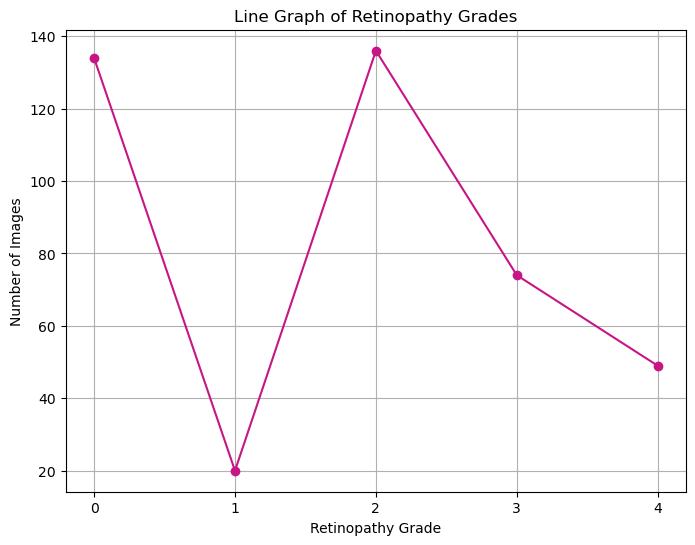

In [30]:
import matplotlib.pyplot as plt

# نحسب عدد الصور في كل درجة
grade_counts = df['Retinopathy grade'].value_counts().sort_index()

# رسم الخط
plt.figure(figsize=(8, 6))
plt.plot(grade_counts.index, grade_counts.values, marker='o', linestyle='-', color='mediumvioletred')

# عنوان ومحاور
plt.title('Line Graph of Retinopathy Grades')
plt.xlabel('Retinopathy Grade')
plt.ylabel('Number of Images')
plt.grid(True)
plt.xticks([0, 1, 2, 3, 4])  # نحدد القيم بالضبط على المحور X

# عرض الرسم
plt.show()
